In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Description of the cascade system

Qmax (KW) = Peak value of heat deamand for the building (Analysing the profile of whole year)

Q1max(KW) = maximum thermal power that heat pump 1 can supply

Q2max(KW) = maximum thermal power that heat pump 2 can supply

Q3max(KW) = maximum thermal power that heat pump 3 can supply

COPref1 = Coefficienct of Performance for Heat pump 1

COPref2 = Coefficienct of Performance for Heat pump 2

COPref3 = Coefficienct of Performance for Heat pump 3

All the three heatpumps can only provide 90% of their maximum thermal power

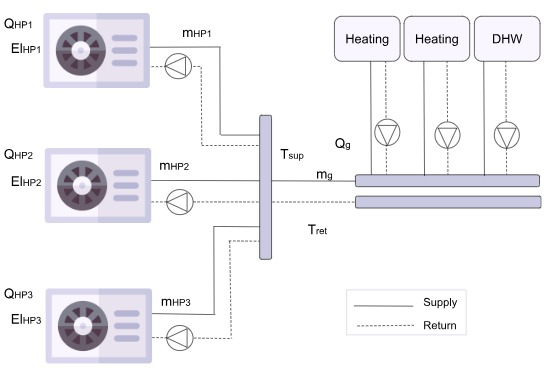


In [ ]:
Qmax = 90
Q1max = 33.33
Q2max = 33.33
Q3max = 33.33
COPref1 = 4.5
COPref2 = 4.5
COPref3 = 4.5

## Generating the synthetic data for splitting heat demands among three heat pumps

target_sums = These values represent various possibilities for the heat demand in the building

q1(KW) = Thermal power supplied by heat pump 1

q2(KW) = Thermal power supplied by heat pump 2

q3(KW) = Thermal power supplied by heat pump 3

max_x1_values = This list stores maximum allowable values q1,q2,q3

q1 + q2 + q3 = target_sums

The first loop stores the value in target_sums list in the range of 30kW to 90kW in a step of 5kW.

An empty list called 'all_combinations' is created to store combination values for q1 , q2 and q3.

The 'granularity' variable is set to 0.5 . This is the step size used in generating combinations. It represents the precision at which values are considered.

The script iterates through each target sum value in target_sums. Within each target sum iteration, it uses nested loops to generate combinations of values for q1, q2, and q3. For each combination of q1, q2, and q3, it checks if their sum is approximately equal to the current target_sums. The np.isclose() function is used with a tolerance specified by granularity (i.e., atol=granularity). If the sum is close enough to the target_sums within the specified tolerance, the combination is added to the combinations list.

After generating all valid combinations for the current target_sums, the combinations list is appended to the all_combinations list.

The code creates a list of DataFrames (dfs) where each DataFrame corresponds to a target_sums. It populates each DataFrame with the combinations of q1, q2, and q3 for that target_sums.

Finally, the code uses pd.concat() from Pandas to concatenate all the DataFrames in the dfs list into one large DataFrame called result_df. This DataFrame contains all the combinations for different target_sums.

In [ ]:
# To ensure that maximum value of q1,q2 and q3 does not go beyond 90% of the maximum capacity
# this part of code can be changed if we have a rule to find the maximum limits of the heat pumps
Q1 = Q1max * 0.9
Q2 = Q2max * 0.9
Q3 = Q3max * 0.9

In [ ]:
# Define the target sums
target_sums = []

for target_sum in range(0, 91, 2):
    target_sums.append(target_sum)

# Initialize an empty list to store all combinations for different target sums
all_combinations = []

# Define the granularity
granularity = 0.5

# Loop through each target sum
for target_sum in target_sums:
    # Generate combinations for the current target sum that satisfy the constraints
    combinations = []
    for q1 in np.arange(0, Q1 + granularity, granularity):
        for q2 in np.arange(0, Q2 + granularity, granularity):
            for q3 in np.arange(0, Q3 + granularity, granularity):
                if np.isclose(q1 + q2 + q3, target_sum, atol=0)&(q1>=q2)&(q2>=q3): #in this step we are arranging q1, q2 and q3 (this will avoid repetition)
                    combinations.append((q1, q2, q3)) #Moreover we are defining a control startegy as well that heat pump 1 will be the first to start

    # Append the combinations for the current target sum to the list
    all_combinations.append(combinations)

# Create a DataFrame from the list of combinations for different target sums
dfs = []
for i, target_sum in enumerate(target_sums):
    df = pd.DataFrame(all_combinations[i], columns=['q1(kW)', 'q2(kW)', 'q3(kW)'])
    df['Sum(kW)'] = target_sum
    dfs.append(df)

# Concatenate the DataFrames into one
result_df = pd.concat(dfs, ignore_index=True)


# Display the sorted result DataFrame
print(result_df)


      q1(kW)  q2(kW)  q3(kW)  Sum(kW)
0        0.0     0.0     0.0        0
1        1.0     0.5     0.5        2
2        1.0     1.0     0.0        2
3        1.5     0.5     0.0        2
4        2.0     0.0     0.0        2
...      ...     ...     ...      ...
9931    29.5    29.5    29.0       88
9932    30.0    29.0    29.0       88
9933    30.0    29.5    28.5       88
9934    30.0    30.0    28.0       88
9935    30.0    30.0    30.0       90

[9936 rows x 4 columns]


In [ ]:
result_df

,q1(kW),q2(kW),q3(kW),Sum(kW)
0,0.0,0.0,0.0,0
1,1.0,0.5,0.5,2
2,1.0,1.0,0.0,2
3,1.5,0.5,0.0,2
4,2.0,0.0,0.0,2
...,...,...,...,...
9931,29.5,29.5,29.0,88
9932,30.0,29.0,29.0,88
9933,30.0,29.5,28.5,88
9934,30.0,30.0,28.0,88


## Boundary Conditions for the 3 heat pumps in cascade mode

Tamb(C) = List that stores ambient temperature values

Tsup(C) = List that stores supply temperature values

The code enters a nested loop, first iterating through each value in the Tamb list and then iterating through each value in the Tsup list. Within the nested loop, a copy of the original DataFrame results_df is created. This copy is named df_copy, and it initially contains the same data as results_df.

In each iteration of the loop, the code adds two new columns to the df_copy DataFrame: 'Tamb' and 'Tsup'. The values for these columns are set to the current values of tamb and tsup, respectively. Essentially, it's adding information about the current temperature conditions to each row of the DataFrame.

After adding the 'Tamb' and 'Tsup' columns to df_copy, it is appended to the dfs list. This means that for each combination of Tamb and Tsup, a new DataFrame is created, and all of these DataFrames are stored in the dfs list.

After the loop has processed all combinations of Tamb and Tsup, the code uses the pd.concat() function to concatenate all the DataFrames in the dfs list into a single DataFrame called df_final. The ignore_index=True argument is used to reset the index of the final DataFrame.

In [ ]:
Tamb = [-15,-7,2,7,14,25,35,45]
Tsup = [50,55,60,65]
# Create an empty list to store DataFrames
dfs = []

# Iterate through all combinations of 'Tamb' and 'Tsup'
for tamb in Tamb:
    for tsup in Tsup:
        # Create a copy of the original DataFrame
        df_copy = result_df.copy()

        # Add 'Tamb' and 'Tsup' columns with current values
        df_copy['Tamb(C)'] = tamb
        df_copy['Tsup(C)'] = tsup

        # Append the DataFrame to the list
        dfs.append(df_copy)

# Concatenate all DataFrames in the list into a final DataFrame
df_final = pd.concat(dfs, ignore_index=True)

df_final

,q1(kW),q2(kW),q3(kW),Sum(kW),Tamb(C),Tsup(C)
0,0.0,0.0,0.0,0,-15,50
1,1.0,0.5,0.5,2,-15,50
2,1.0,1.0,0.0,2,-15,50
3,1.5,0.5,0.0,2,-15,50
4,2.0,0.0,0.0,2,-15,50
...,...,...,...,...,...,...
317947,29.5,29.5,29.0,88,45,65
317948,30.0,29.0,29.0,88,45,65
317949,30.0,29.5,28.5,88,45,65
317950,30.0,30.0,28.0,88,45,65


In [ ]:
print(df_final['q1(kW)'].max())
print(df_final['q2(kW)'].max())
print(df_final['q3(kW)'].max())

30.0
30.0
30.0


## EnergyPlus Heat Pump Model

### PLR = Q/Qavail

### Qavail = Qref* CapFT

### Qref = Qmax

### CapFT = a0 + (a1* Tsup) + (a2* Tsup^2) + (a3* Tout) + (a4* Tout^2) + (a5* Tsup * Tout)

where,

a0 = 1.34, a1 = -0.0108, a2 = 7.9E-05, a3 = 6.70E-14, a4 = -3.08E-16, a5 = -7.85E-16

### EIRFTemp = b0 + (b1* Tsup) + (b2* Tsup^2) + (b3* Tout) + (b4* Tout^2) + (b5* Tsup * Tout)

b0 = -2.55, b1 = 1.1E-01, b2 = 7.69E-04, b3 = -1.36E-03, b4 = 2.7E-5, b5 = -2.34E-05

### EIRFPLR = c0 + (c1* PLR) + (c2* PLR^2)

c0 = 0.58102622, c1 = 0.6782889, c2 = -0.25950015

### PE = (Qavail) * (1/COPref) * (EIRFTemp) * (EIRFPLR)



In [ ]:
df_final['CAPFT'] = 1.34 - 1.08E-2*df_final['Tsup(C)'] + 7.9E-05*((df_final['Tsup(C)'])**2) + 6.7E-14*(df_final['Tamb(C)']) - 3.08E-16*((df_final['Tamb(C)'])**2) - 7.85E-16*df_final['Tsup(C)']*df_final['Tamb(C)']
df_final['Qavail1'] = df_final['CAPFT'] * Q1max
df_final['Qavail2'] = df_final['CAPFT'] * Q2max
df_final['Qavail3'] = df_final['CAPFT'] * Q3max
df_final['PLR1'] = df_final['q1(kW)']/df_final['Qavail1']
df_final['PLR2'] = df_final['q2(kW)']/df_final['Qavail2']
df_final['PLR3'] = df_final['q3(kW)']/df_final['Qavail3']
df_final['EIRFT'] = -2.55 + 1.1E-1*df_final['Tsup(C)'] - 7.69E-04*((df_final['Tsup(C)'])**2) - 1.36E-3*(df_final['Tamb(C)']) + 2.7E-5*((df_final['Tamb(C)'])**2) - 2.34E-5*df_final['Tsup(C)']*df_final['Tamb(C)']
df_final['EIRFPLR1'] = -1.511309 + 4.363151* df_final['PLR1'] -1.851287*(df_final['PLR1'])**2
df_final['EIRFPLR2'] = -1.511309 + 4.363151* df_final['PLR2'] -1.851287*(df_final['PLR2'])**2
df_final['EIRFPLR3'] = -1.511309 + 4.363151* df_final['PLR3'] -1.851287*(df_final['PLR3'])**2
df_final['Pel1(kW)'] = df_final['Qavail1'] * df_final['EIRFT'] * df_final['EIRFPLR1']/ COPref1
df_final['Pel2(kW)'] = df_final['Qavail2'] * df_final['EIRFT'] * df_final['EIRFPLR2']/ COPref2
df_final['Pel3(kW)'] = df_final['Qavail3'] * df_final['EIRFT'] * df_final['EIRFPLR3']/ COPref3

In [ ]:
df_final

,q1(kW),q2(kW),q3(kW),Sum(kW),Tamb(C),Tsup(C),CAPFT,Qavail1,Qavail2,Qavail3,PLR1,PLR2,PLR3,EIRFT,EIRFPLR1,EIRFPLR2,EIRFPLR3,Pel1(kW),Pel2(kW),Pel3(kW)
0,0.0,0.0,0.0,0,-15,50,0.997500,33.246675,33.246675,33.246675,0.000000,0.000000,0.000000,1.071525,-1.511309,-1.511309,-1.511309,-11.964410,-11.964410,-11.964410
1,1.0,0.5,0.5,2,-15,50,0.997500,33.246675,33.246675,33.246675,0.030078,0.015039,0.015039,1.071525,-1.381748,-1.446110,-1.446110,-10.938730,-11.448255,-11.448255
2,1.0,1.0,0.0,2,-15,50,0.997500,33.246675,33.246675,33.246675,0.030078,0.030078,0.000000,1.071525,-1.381748,-1.381748,-1.511309,-10.938730,-10.938730,-11.964410
3,1.5,0.5,0.0,2,-15,50,0.997500,33.246675,33.246675,33.246675,0.045117,0.015039,0.000000,1.071525,-1.318224,-1.446110,-1.511309,-10.435834,-11.448255,-11.964410
4,2.0,0.0,0.0,2,-15,50,0.997500,33.246675,33.246675,33.246675,0.060156,0.000000,0.000000,1.071525,-1.255537,-1.511309,-1.511309,-9.939568,-11.964410,-11.964410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317947,29.5,29.5,29.0,88,45,65,0.971775,32.389261,32.389261,32.389261,0.910796,0.910796,0.895359,1.276005,0.926897,0.926897,0.911160,8.512801,8.512801,8.368267
317948,30.0,29.0,29.0,88,45,65,0.971775,32.389261,32.389261,32.389261,0.926233,0.895359,0.895359,1.276005,0.941752,0.911160,0.911160,8.649232,8.368267,8.368267
317949,30.0,29.5,28.5,88,45,65,0.971775,32.389261,32.389261,32.389261,0.926233,0.910796,0.879921,1.276005,0.941752,0.926897,0.894540,8.649232,8.512801,8.215628
317950,30.0,30.0,28.0,88,45,65,0.971775,32.389261,32.389261,32.389261,0.926233,0.926233,0.864484,1.276005,0.941752,0.941752,0.877038,8.649232,8.649232,8.054886


In [ ]:
# Define conditions to drop rows for q1, q2, and q3
condition_q1 = (df_final['PLR1'] > 0) & (df_final['PLR1'] < 0.55)
condition_q2 = (df_final['PLR2'] > 0) & (df_final['PLR2'] < 0.55)
condition_q3 = (df_final['PLR3'] > 0) & (df_final['PLR3'] < 0.55)
condition_PLR1 = (df_final['PLR1'] > 1)
condition_PLR2 = (df_final['PLR2'] > 1)
condition_PLR3 = (df_final['PLR3'] > 1)
# Use the conditions to filter rows and keep only the ones that don't meet the conditions
df_final = df_final[~condition_q1 & ~condition_q2 & ~condition_q3 & ~condition_PLR1 & ~condition_PLR2 & ~condition_PLR3]

## Data modification 2

When q1 = 0 then Pel1 = 0

When q2 = 0 then Pel2 = 0

When q3 = 0 then Pel3 = 0

In [ ]:
# Set Pel1 to 0 when q1 is 0
df_final.loc[df_final['q1(kW)'] == 0, 'Pel1(kW)'] = 0

# Set Pel2 to 0 when q2 is 0
df_final.loc[df_final['q2(kW)'] == 0, 'Pel2(kW)'] = 0

# Set Pel3 to 0 when q3 is 0
df_final.loc[df_final['q3(kW)'] == 0, 'Pel3(kW)'] = 0


In [ ]:
df_final

,q1(kW),q2(kW),q3(kW),Sum(kW),Tamb(C),Tsup(C),CAPFT,Qavail1,Qavail2,Qavail3,PLR1,PLR2,PLR3,EIRFT,EIRFPLR1,EIRFPLR2,EIRFPLR3,Pel1(kW),Pel2(kW),Pel3(kW)
0,0.0,0.0,0.0,0,-15,50,0.997500,33.246675,33.246675,33.246675,0.000000,0.000000,0.000000,1.071525,-1.511309,-1.511309,-1.511309,0.000000,0.000000,0.000000
631,20.0,0.0,0.0,20,-15,50,0.997500,33.246675,33.246675,33.246675,0.601564,0.000000,0.000000,1.071525,0.443463,-1.511309,-1.511309,3.510714,0.000000,0.000000
815,22.0,0.0,0.0,22,-15,50,0.997500,33.246675,33.246675,33.246675,0.661720,0.000000,0.000000,1.071525,0.565247,-1.511309,-1.511309,4.474824,0.000000,0.000000
1032,24.0,0.0,0.0,24,-15,50,0.997500,33.246675,33.246675,33.246675,0.721877,0.000000,0.000000,1.071525,0.673631,-1.511309,-1.511309,5.332861,0.000000,0.000000
1284,26.0,0.0,0.0,26,-15,50,0.997500,33.246675,33.246675,33.246675,0.782033,0.000000,0.000000,1.071525,0.768617,-1.511309,-1.511309,6.084825,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317947,29.5,29.5,29.0,88,45,65,0.971775,32.389261,32.389261,32.389261,0.910796,0.910796,0.895359,1.276005,0.926897,0.926897,0.911160,8.512801,8.512801,8.368267
317948,30.0,29.0,29.0,88,45,65,0.971775,32.389261,32.389261,32.389261,0.926233,0.895359,0.895359,1.276005,0.941752,0.911160,0.911160,8.649232,8.368267,8.368267
317949,30.0,29.5,28.5,88,45,65,0.971775,32.389261,32.389261,32.389261,0.926233,0.910796,0.879921,1.276005,0.941752,0.926897,0.894540,8.649232,8.512801,8.215628
317950,30.0,30.0,28.0,88,45,65,0.971775,32.389261,32.389261,32.389261,0.926233,0.926233,0.864484,1.276005,0.941752,0.941752,0.877038,8.649232,8.649232,8.054886


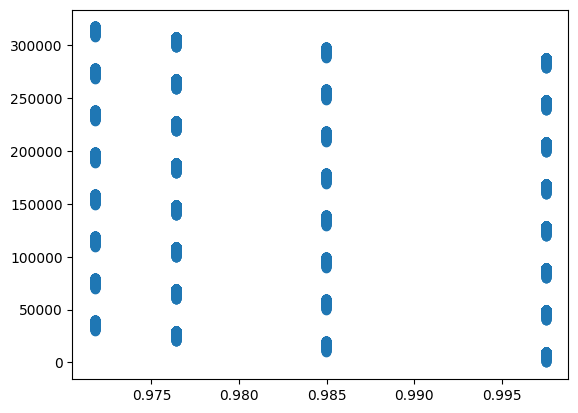

In [ ]:
plt.scatter(df_final['CAPFT'],df_final.index)
plt.show()

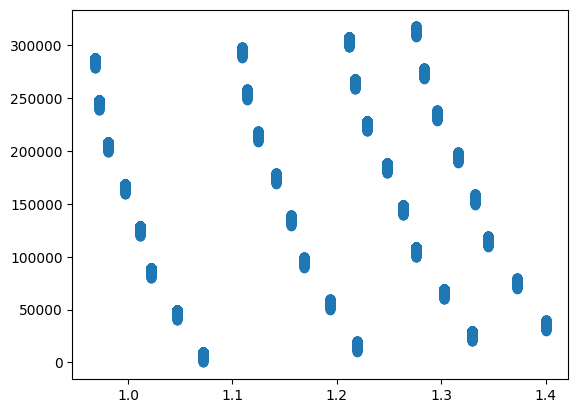

In [ ]:
plt.scatter(df_final['EIRFT'],df_final.index)
plt.show()

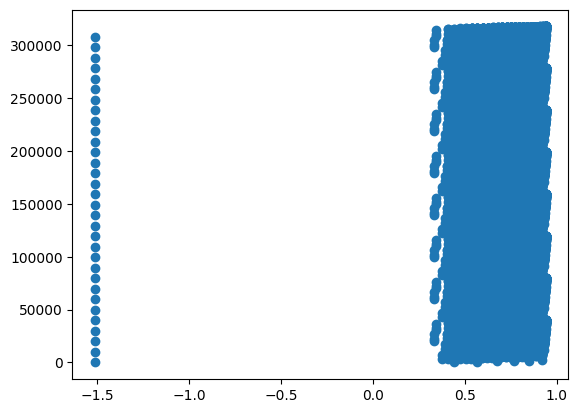

In [ ]:
plt.scatter(df_final['EIRFPLR1'],df_final.index)
plt.show()

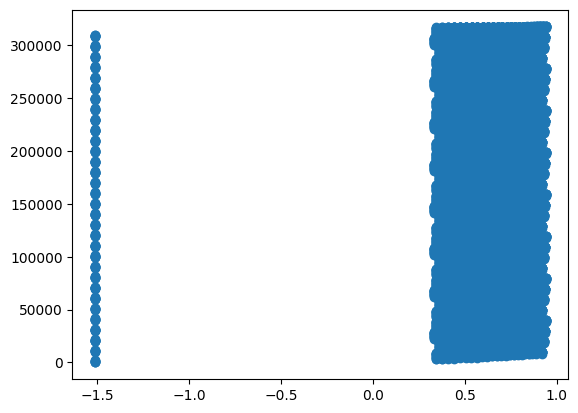

In [ ]:
plt.scatter(df_final['EIRFPLR2'],df_final.index)
plt.show()

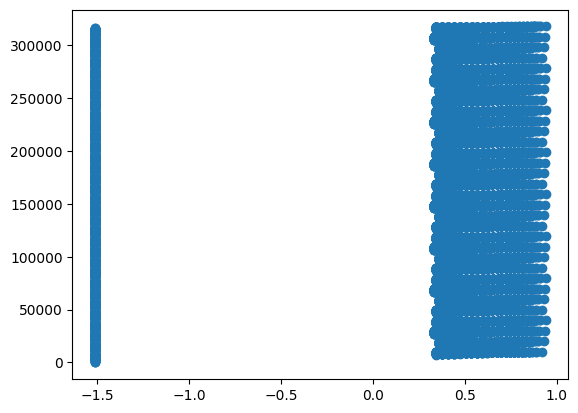

In [ ]:
plt.scatter(df_final['EIRFPLR3'],df_final.index)
plt.show()

### Calculating total electric power and overall COP



In [ ]:
df_final['Pel_total(kW)'] = df_final['Pel1(kW)'] + df_final['Pel2(kW)'] + df_final['Pel3(kW)']
df_final['COP_cascade'] =  df_final['Sum(kW)']/df_final['Pel_total(kW)']

<ipython-input-237-cb70d0f9641b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Pel_total(kW)'] = df_final['Pel1(kW)'] + df_final['Pel2(kW)'] + df_final['Pel3(kW)']
<ipython-input-237-cb70d0f9641b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['COP_cascade'] =  df_final['Sum(kW)']/df_final['Pel_total(kW)']


## Calculating the COP of each heat pump so that we can understand how each heat pump is behaving at the end

In [ ]:
df_final['COP_HP1'] = df_final['q1(kW)']/df_final['Pel1(kW)']
df_final['COP_HP2'] = df_final['q2(kW)']/df_final['Pel2(kW)']
df_final['COP_HP3'] = df_final['q3(kW)']/df_final['Pel3(kW)']

<ipython-input-238-ba5683611583>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['COP_HP1'] = df_final['q1(kW)']/df_final['Pel1(kW)']
<ipython-input-238-ba5683611583>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['COP_HP2'] = df_final['q2(kW)']/df_final['Pel2(kW)']
<ipython-input-238-ba5683611583>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
df_final

,q1(kW),q2(kW),q3(kW),Sum(kW),Tamb(C),Tsup(C),CAPFT,Qavail1,Qavail2,Qavail3,...,EIRFPLR2,EIRFPLR3,Pel1(kW),Pel2(kW),Pel3(kW),Pel_total(kW),COP_cascade,COP_HP1,COP_HP2,COP_HP3
0,0.0,0.0,0.0,0,-15,50,0.997500,33.246675,33.246675,33.246675,...,-1.511309,-1.511309,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
631,20.0,0.0,0.0,20,-15,50,0.997500,33.246675,33.246675,33.246675,...,-1.511309,-1.511309,3.510714,0.000000,0.000000,3.510714,5.696847,5.696847,NaN,NaN
815,22.0,0.0,0.0,22,-15,50,0.997500,33.246675,33.246675,33.246675,...,-1.511309,-1.511309,4.474824,0.000000,0.000000,4.474824,4.916394,4.916394,NaN,NaN
1032,24.0,0.0,0.0,24,-15,50,0.997500,33.246675,33.246675,33.246675,...,-1.511309,-1.511309,5.332861,0.000000,0.000000,5.332861,4.500398,4.500398,NaN,NaN
1284,26.0,0.0,0.0,26,-15,50,0.997500,33.246675,33.246675,33.246675,...,-1.511309,-1.511309,6.084825,0.000000,0.000000,6.084825,4.272925,4.272925,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317947,29.5,29.5,29.0,88,45,65,0.971775,32.389261,32.389261,32.389261,...,0.926897,0.911160,8.512801,8.512801,8.368267,25.393869,3.465403,3.465369,3.465369,3.465473
317948,30.0,29.0,29.0,88,45,65,0.971775,32.389261,32.389261,32.389261,...,0.911160,0.911160,8.649232,8.368267,8.368267,25.385766,3.466510,3.468516,3.465473,3.465473
317949,30.0,29.5,28.5,88,45,65,0.971775,32.389261,32.389261,32.389261,...,0.926897,0.894540,8.649232,8.512801,8.215628,25.377662,3.467617,3.468516,3.465369,3.468998
317950,30.0,30.0,28.0,88,45,65,0.971775,32.389261,32.389261,32.389261,...,0.941752,0.877038,8.649232,8.649232,8.054886,25.353351,3.470942,3.468516,3.468516,3.476151


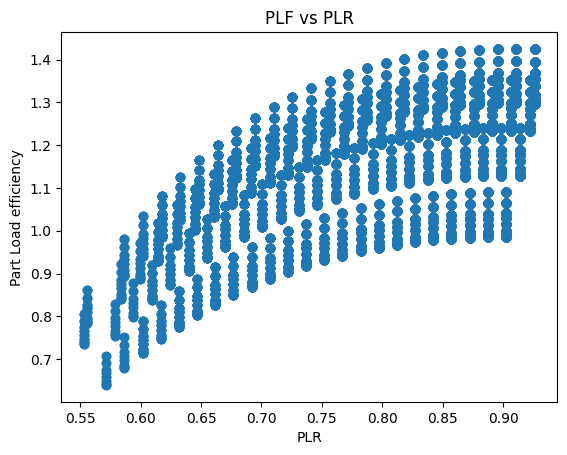

In [ ]:
plt.scatter(df_final['PLR1'],COPref1/df_final['COP_HP1'])
plt.xlabel('PLR')
plt.ylabel('Part Load efficiency')
plt.title('PLF vs PLR')
plt.show()

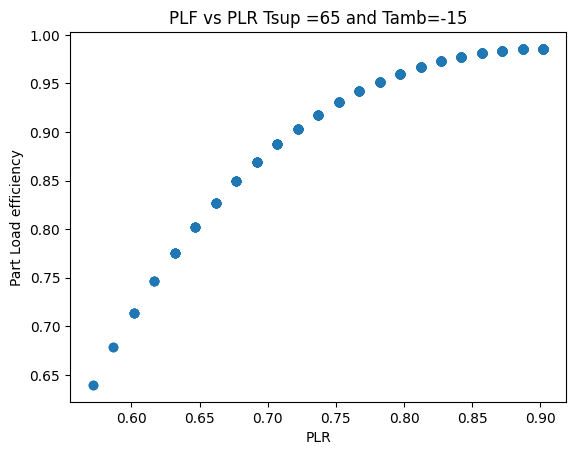

In [ ]:
df_DOE_plot = df_final[(df_final['Tsup(C)']==50)&(df_final['Tamb(C)']==45)]
plt.scatter(df_DOE_plot['PLR1'],COPref1/df_DOE_plot['COP_HP1'])
plt.xlabel('PLR')
plt.ylabel('Part Load efficiency')
plt.title('PLF vs PLR Tsup =65 and Tamb=-15')
plt.show()

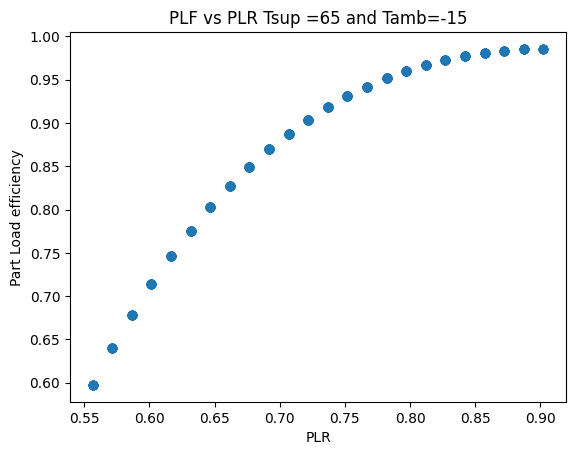

In [ ]:
df_DOE_plot = df_final[(df_final['Tsup(C)']==50)&(df_final['Tamb(C)']==45)]
plt.scatter(df_DOE_plot['PLR2'],COPref2/df_DOE_plot['COP_HP2'])
plt.xlabel('PLR')
plt.ylabel('Part Load efficiency')
plt.title('PLF vs PLR Tsup =65 and Tamb=-15')
plt.show()

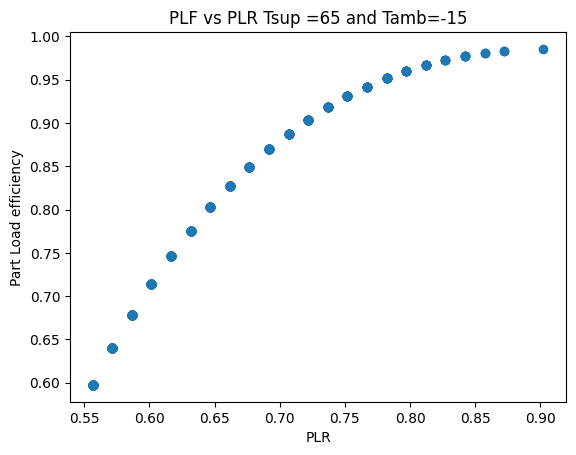

In [ ]:
df_DOE_plot = df_final[(df_final['Tsup(C)']==50)&(df_final['Tamb(C)']==45)]
plt.scatter(df_DOE_plot['PLR3'],COPref3/df_DOE_plot['COP_HP3'])
plt.xlabel('PLR')
plt.ylabel('Part Load efficiency')
plt.title('PLF vs PLR Tsup =65 and Tamb=-15')
plt.show()

## Heat pump 1
Case 1 : Sum = 80kW Tout= 7C Tsup = 50

Case 2 : Sum = 80kW Tout= 7C Tsup = 60

In [ ]:
df_case1 = df_final[(df_final['Tamb(C)']==7)&(df_final['Tsup(C)']==50)]
df_case2 = df_final[(df_final['Tamb(C)']==7)&(df_final['Tsup(C)']==60)]

#### Plot for Pel1 vs q1 for heat pump 1 for 2 different cases

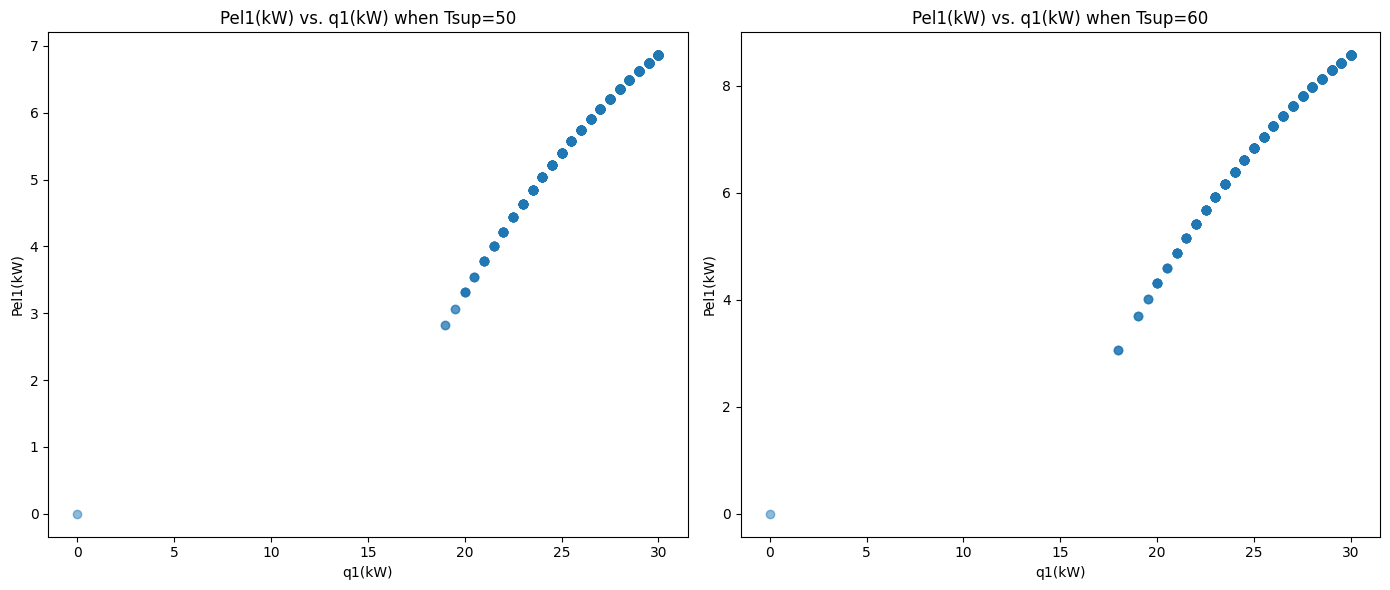

In [ ]:
pel1 = df_case1['Pel1(kW)']
q1 = df_case1['q1(kW)']
pel2 = df_case2['Pel1(kW)']
q2 = df_case2['q1(kW)']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns


ax1.scatter(q1, pel1, alpha=0.5)  # Alpha adjusts the transparency of points
ax1.set_xlabel('q1(kW)')
ax1.set_ylabel('Pel1(kW)')
ax1.set_title('Pel1(kW) vs. q1(kW) when Tsup=50')


ax2.scatter(q2, pel2, alpha=0.5)  # Alpha adjusts the transparency of points
ax2.set_xlabel('q1(kW)')
ax2.set_ylabel('Pel1(kW)')
ax2.set_title('Pel1(kW) vs. q1(kW) when Tsup=60')

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Plot for PLR1 vs q1 for heat pump 1 for 2 different cases

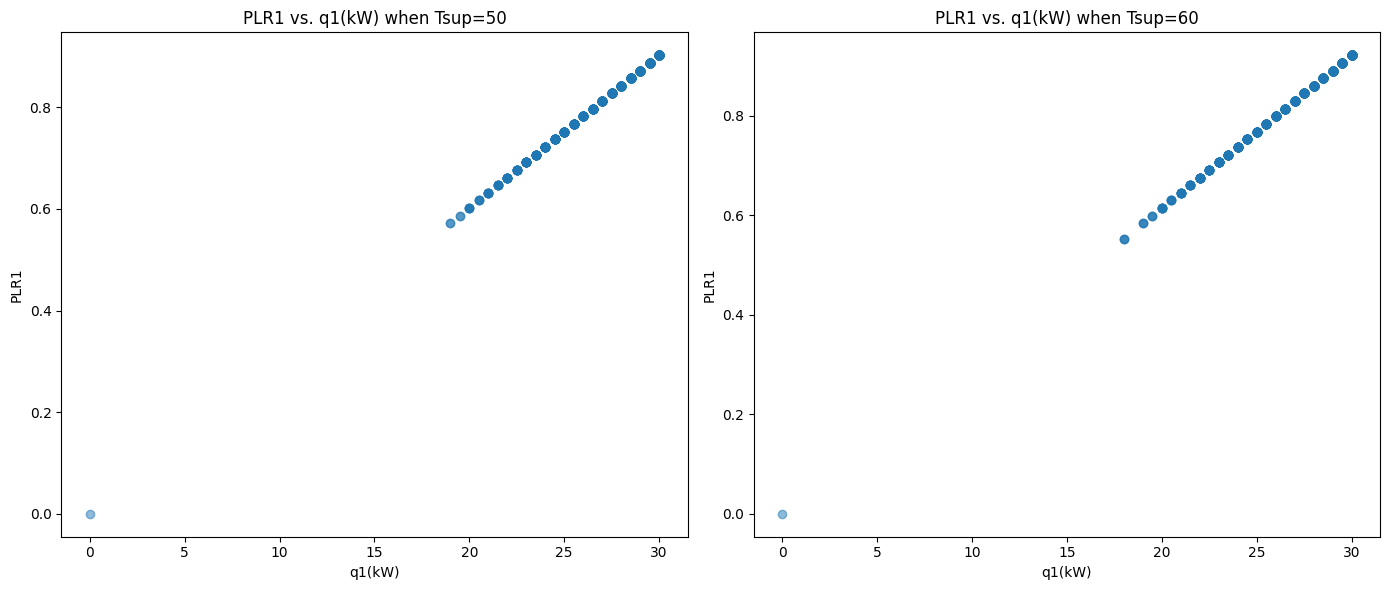

In [ ]:
plr1 = df_case1['PLR1']
q1 = df_case1['q1(kW)']
plr2 = df_case2['PLR1']
q2 = df_case2['q1(kW)']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

ax1.scatter(q1, plr1, alpha=0.5)  # Alpha adjusts the transparency of points
ax1.set_xlabel('q1(kW)')
ax1.set_ylabel('PLR1')
ax1.set_title('PLR1 vs. q1(kW) when Tsup=50')


ax2.scatter(q2, plr2, alpha=0.5)  # Alpha adjusts the transparency of points
ax2.set_xlabel('q1(kW)')
ax2.set_ylabel('PLR1')
ax2.set_title('PLR1 vs. q1(kW) when Tsup=60')

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()


## Heat Pump 2

#### Plot for Pel2 vs q2 for heat pump 2 for 2 different cases

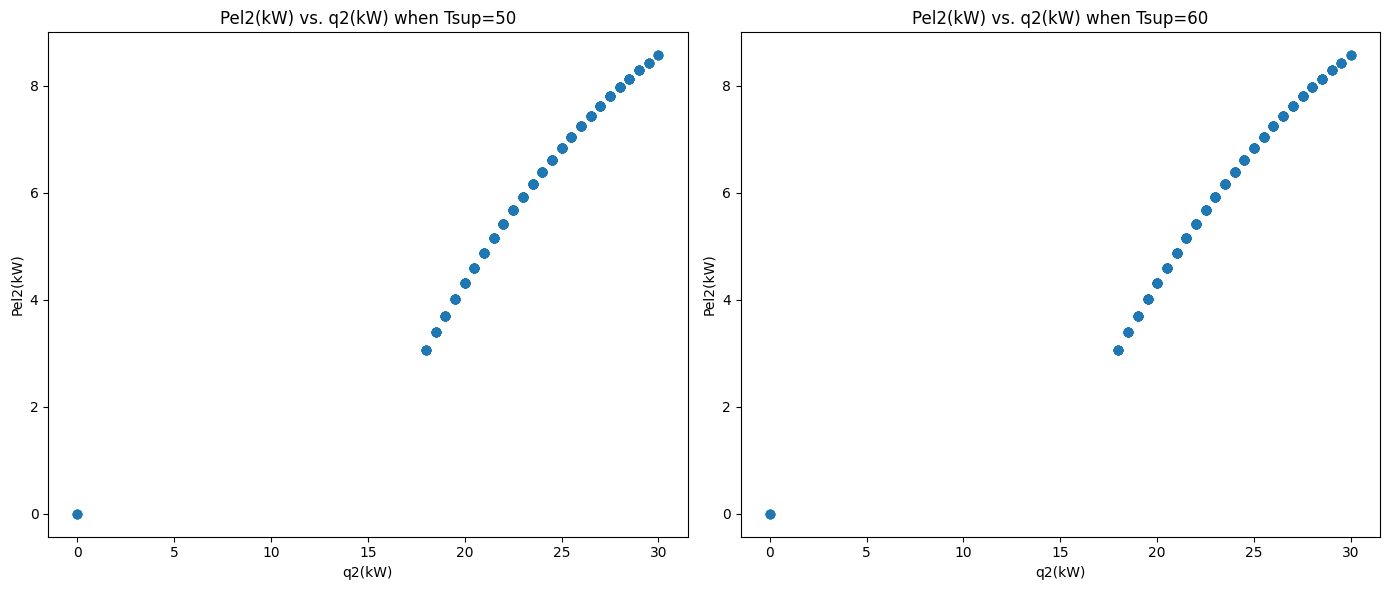

In [ ]:
pel1 = df_case1['Pel2(kW)']
q1 = df_case1['q2(kW)']
pel2 = df_case2['Pel2(kW)']
q2 = df_case2['q2(kW)']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot the first subplot
ax1.scatter(q2, pel2, alpha=0.5)  # Alpha adjusts the transparency of points
ax1.set_xlabel('q2(kW)')
ax1.set_ylabel('Pel2(kW)')
ax1.set_title('Pel2(kW) vs. q2(kW) when Tsup=50')

# Plot the second subplot
ax2.scatter(q2, pel2, alpha=0.5)  # Alpha adjusts the transparency of points
ax2.set_xlabel('q2(kW)')
ax2.set_ylabel('Pel2(kW)')
ax2.set_title('Pel2(kW) vs. q2(kW) when Tsup=60')

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Plot for PLR2 vs q2 for heat pump 2 for 2 different cases

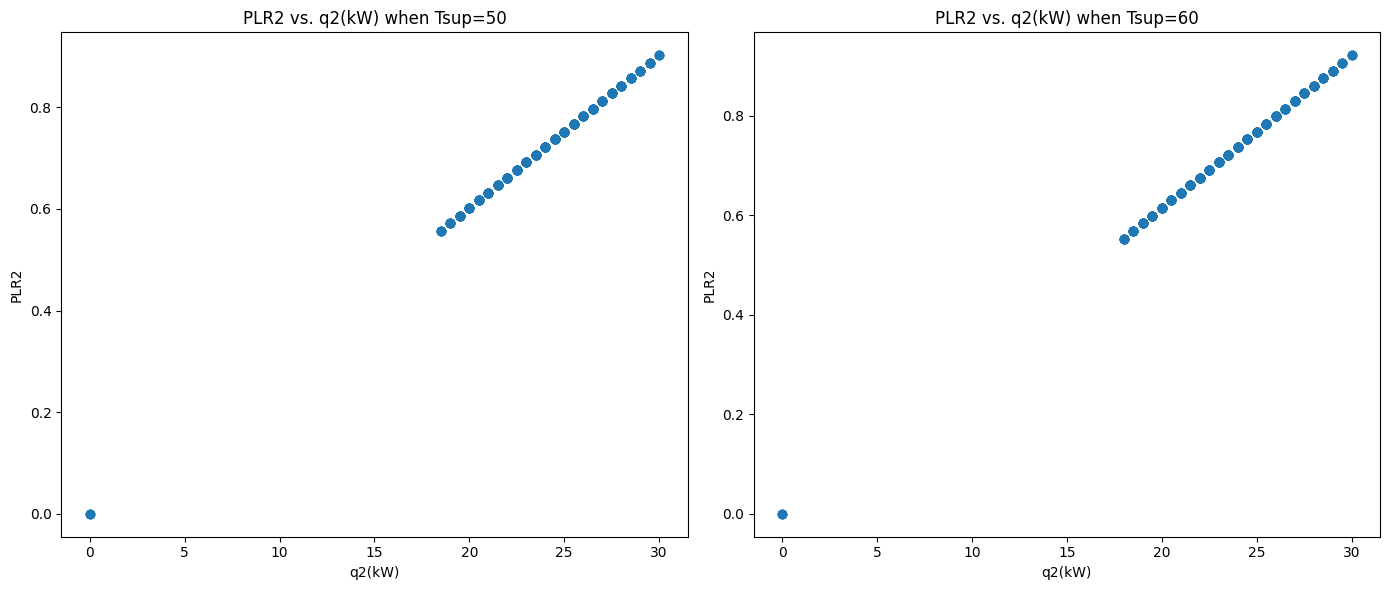

In [ ]:
plr1 = df_case1['PLR2']
q1 = df_case1['q2(kW)']
plr2 = df_case2['PLR2']
q2 = df_case2['q2(kW)']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

ax1.scatter(q1, plr1, alpha=0.5)  # Alpha adjusts the transparency of points
ax1.set_xlabel('q2(kW)')
ax1.set_ylabel('PLR2')
ax1.set_title('PLR2 vs. q2(kW) when Tsup=50')

ax2.scatter(q2, plr2, alpha=0.5)  # Alpha adjusts the transparency of points
ax2.set_xlabel('q2(kW)')
ax2.set_ylabel('PLR2')
ax2.set_title('PLR2 vs. q2(kW) when Tsup=60')

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Heat Pump 3

#### Plot for Pel3 vs q3 for heat pump 3: for 2 different cases




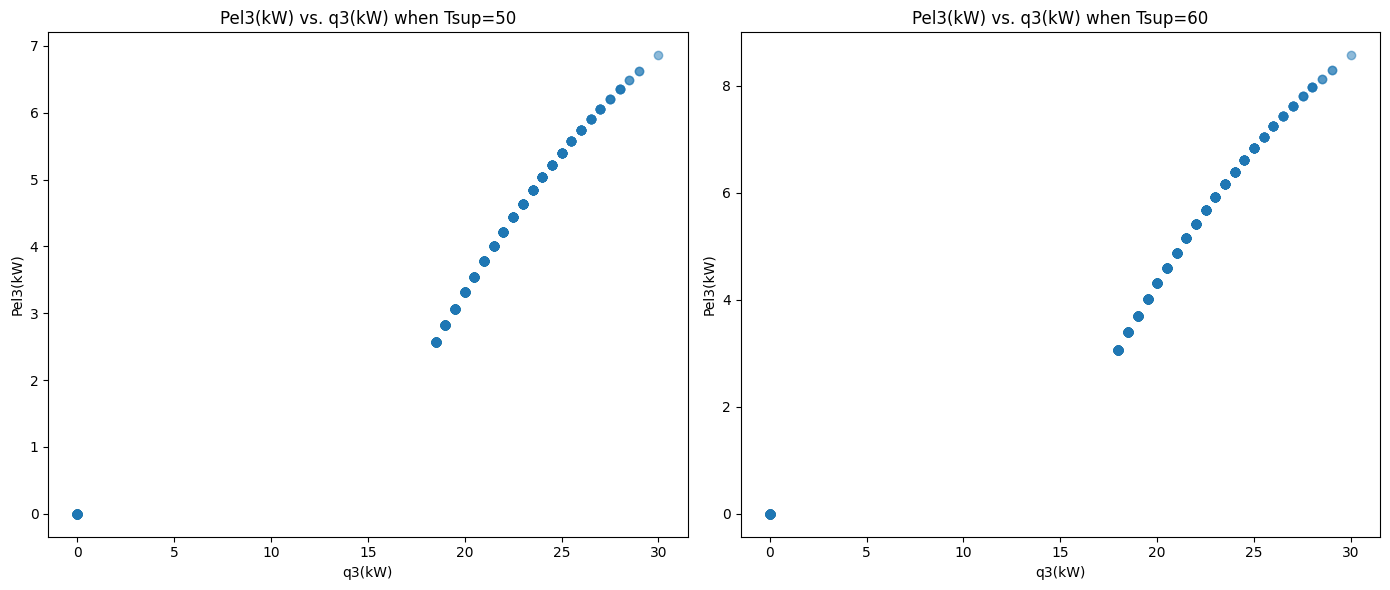

In [ ]:
pel1 = df_case1['Pel3(kW)']
q1 = df_case1['q3(kW)']
pel2 = df_case2['Pel3(kW)']
q2 = df_case2['q3(kW)']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

ax1.scatter(q1, pel1, alpha=0.5)  # Alpha adjusts the transparency of points
ax1.set_xlabel('q3(kW)')
ax1.set_ylabel('Pel3(kW)')
ax1.set_title('Pel3(kW) vs. q3(kW) when Tsup=50')

ax2.scatter(q2, pel2, alpha=0.5)  # Alpha adjusts the transparency of points
ax2.set_xlabel('q3(kW)')
ax2.set_ylabel('Pel3(kW)')
ax2.set_title('Pel3(kW) vs. q3(kW) when Tsup=60')

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Plot for PLR3 vs q3 for heat pump 3 for 2 different cases

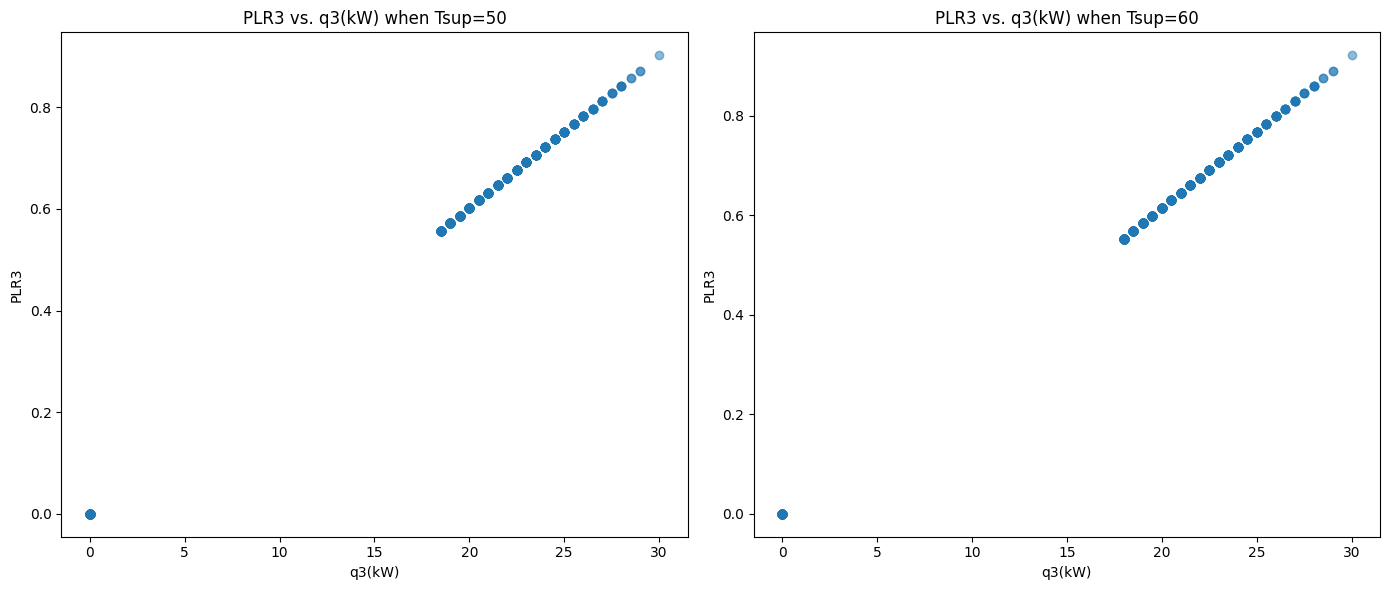

In [ ]:
plr1 = df_case1['PLR3']
q1 = df_case1['q3(kW)']
plr2 = df_case2['PLR3']
q2 = df_case2['q3(kW)']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

ax1.scatter(q1, plr1, alpha=0.5)  # Alpha adjusts the transparency of points
ax1.set_xlabel('q3(kW)')
ax1.set_ylabel('PLR3')
ax1.set_title('PLR3 vs. q3(kW) when Tsup=50')

ax2.scatter(q2, plr2, alpha=0.5)  # Alpha adjusts the transparency of points
ax2.set_xlabel('q3(kW)')
ax2.set_ylabel('PLR3')
ax2.set_title('PLR3 vs. q3(kW) when Tsup=60')

# Adjust the space between subplots
plt.tight_layout()

# Show the plot
plt.show()

## Plot to understand the variation of COP_cascade for a given heat demand



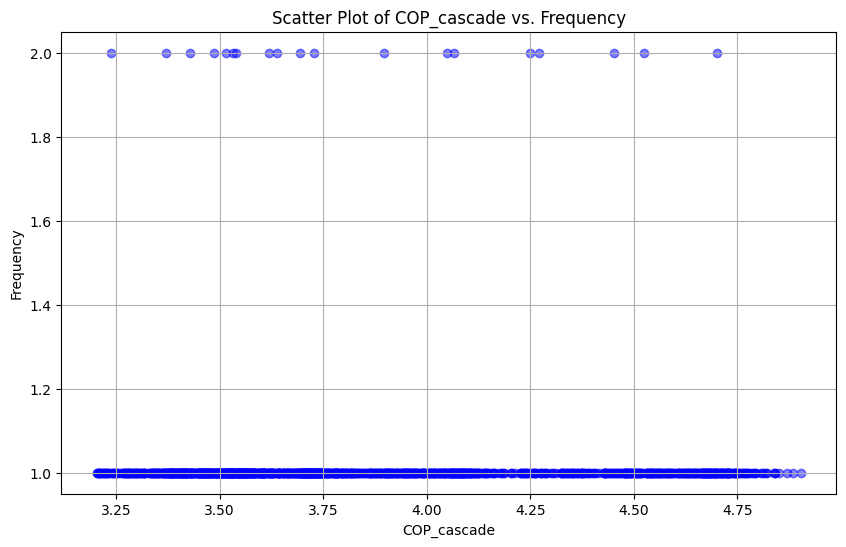

In [ ]:
# Filter the DataFrame to select rows where heat demand is 80 kW
filtered_df = df_final[(df_final['Sum(kW)'] == 80)]

# Compute the frequency of COP_cascade values
cop_cascade_counts = filtered_df['COP_cascade'].value_counts()

# Extract the COP_cascade values (x-axis) and their frequencies (y-axis)
cop_cascade_values = cop_cascade_counts.index
frequency = cop_cascade_counts.values

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
plt.scatter(cop_cascade_values, frequency, marker='o', color='blue', alpha=0.5)
plt.title('Scatter Plot of COP_cascade vs. Frequency')
plt.xlabel('COP_cascade')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.show()


## Data for Training decision tree (Optimization)

In the above code, all the possible combination of thermal load among three heat pumps has been calculated for a given heat demand.

Now for a given boundary condition, which include Tamb, Tsup and building thermal demand there should be only one operational condition for heat pump in cascade mode. Operational condition means thermal load distribution among three heat pumps.

To find the most optimal mode, the thermal distribution with lowest Pel_total(kW) or the condition with highest COP_cascade must be selected.

In [ ]:
condition = (df_final['Tamb(C)'] == 7) & (df_final['Tsup(C)'] == 50) & (df_final['Sum(kW)'] == 80)

# Apply the condition to filter rows
filtered_df = df_final[condition]

# Display the filtered DataFrame
print(filtered_df)

        q1(kW)  q2(kW)  q3(kW)  Sum(kW)  Tamb(C)  Tsup(C)   CAPFT    Qavail1  \
129060    27.0    26.5    26.5       80        7       50  0.9975  33.246675   
129061    27.0    27.0    26.0       80        7       50  0.9975  33.246675   
129062    27.5    26.5    26.0       80        7       50  0.9975  33.246675   
129063    27.5    27.0    25.5       80        7       50  0.9975  33.246675   
129064    27.5    27.5    25.0       80        7       50  0.9975  33.246675   
129065    28.0    26.0    26.0       80        7       50  0.9975  33.246675   
129066    28.0    26.5    25.5       80        7       50  0.9975  33.246675   
129067    28.0    27.0    25.0       80        7       50  0.9975  33.246675   
129068    28.0    27.5    24.5       80        7       50  0.9975  33.246675   
129069    28.0    28.0    24.0       80        7       50  0.9975  33.246675   
129070    28.5    26.0    25.5       80        7       50  0.9975  33.246675   
129071    28.5    26.5    25.0       80 

### Among 44 possible unique possibilities only the most optimized case which means on with highest COP_cascade is chosen

We can just choose value with the highest COP_cascade so that we have the most opttimized distribution of heat load among three different heat pumps

In [ ]:
## Most optimized case

filter = filtered_df[filtered_df['COP_cascade']==filtered_df['COP_cascade'].max()]
filter

,q1(kW),q2(kW),q3(kW),Sum(kW),Tamb(C),Tsup(C),CAPFT,Qavail1,Qavail2,Qavail3,...,EIRFPLR2,EIRFPLR3,Pel1(kW),Pel2(kW),Pel3(kW),Pel_total(kW),COP_cascade,COP_HP1,COP_HP2,COP_HP3
129103,30.0,30.0,20.0,80,7,50,0.9975,33.246675,33.246675,33.246675,...,0.918392,0.443463,6.860625,6.860625,3.312782,17.034032,4.69648,4.372779,4.372779,6.037222


### Same strategy can be applied for remaining dataset

In [ ]:
# Define lists of values for Tamb, Tsup, and Sum
Tamb_values = [-15, -7, 2, 7, 14, 25, 35, 45]
Tsup_values = [50, 55, 60, 65]
Sum_values = list(range(0, 91, 2))

# Initialize an empty DataFrame to store the filtered results
filtered_results = pd.DataFrame()

# Iterate through each unique combination of Tamb, Tsup, and Sum and choose the optimized condition for each case
for Tamb in Tamb_values:
    for Tsup in Tsup_values:
        for Sum in Sum_values:
            # Filter the rows based on the current combination
            condition = (df_final['Tamb(C)'] == Tamb) & (df_final['Tsup(C)'] == Tsup) & (df_final['Sum(kW)'] == Sum)
            filtered_rows = df_final[condition]

            # Check if there are rows matching the condition
            if not filtered_rows.empty:
                # Find the row with the highest COP_cascade within this combination
                max_cop_row = filtered_rows[filtered_rows['COP_cascade'] == filtered_rows['COP_cascade'].max()]
                # Append the selected row to the filtered_results DataFrame
                filtered_results = pd.concat([filtered_results, max_cop_row], ignore_index=True)

# Display the filtered results
print(filtered_results)


      q1(kW)  q2(kW)  q3(kW)  Sum(kW)  Tamb(C)  Tsup(C)     CAPFT    Qavail1  \
0       20.0     0.0     0.0       20      -15       50  0.997500  33.246675   
1       22.0     0.0     0.0       22      -15       50  0.997500  33.246675   
2       24.0     0.0     0.0       24      -15       50  0.997500  33.246675   
3       26.0     0.0     0.0       26      -15       50  0.997500  33.246675   
4       28.0     0.0     0.0       28      -15       50  0.997500  33.246675   
...      ...     ...     ...      ...      ...      ...       ...        ...   
1083    30.0    30.0    22.0       82       45       65  0.971775  32.389261   
1084    30.0    30.0    24.0       84       45       65  0.971775  32.389261   
1085    30.0    30.0    26.0       86       45       65  0.971775  32.389261   
1086    30.0    30.0    28.0       88       45       65  0.971775  32.389261   
1087    30.0    30.0    30.0       90       45       65  0.971775  32.389261   

        Qavail2    Qavail3  ...  EIRFPL

## Plot to understand the variation of COP_cascade for the most optimized data_set

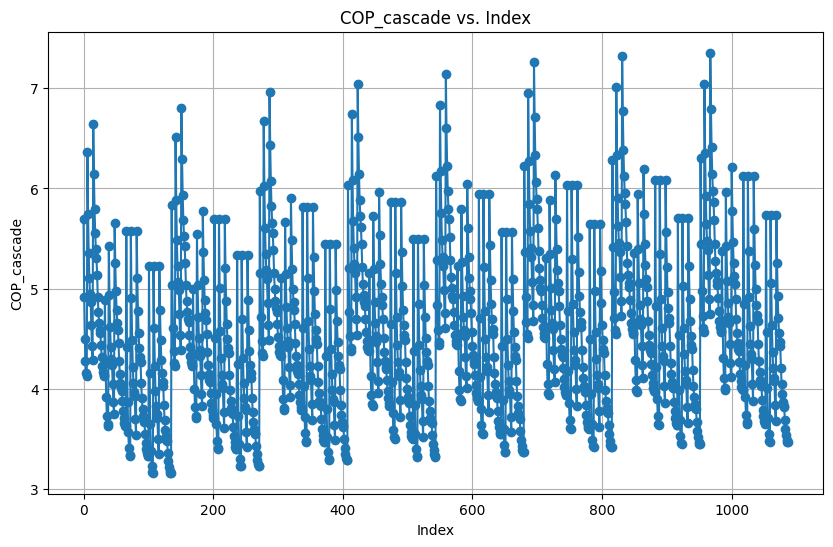

In [ ]:
# Extract the COP_cascade values
cop_values = filtered_results['COP_cascade']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(cop_values, marker='o', linestyle='-')
plt.title('COP_cascade vs. Index')
plt.xlabel('Index')
plt.ylabel('COP_cascade')
plt.grid(True)

# Show the plot
plt.show()

In [ ]:
filtered_results[filtered_results['Sum(kW)']==70]

,q1(kW),q2(kW),q3(kW),Sum(kW),Tamb(C),Tsup(C),CAPFT,Qavail1,Qavail2,Qavail3,...,EIRFPLR2,EIRFPLR3,Pel1(kW),Pel2(kW),Pel3(kW),Pel_total(kW),COP_cascade,COP_HP1,COP_HP2,COP_HP3
22,30.0,21.5,18.5,70,-15,50,0.997500,33.246675,33.246675,33.246675,...,0.536057,0.343332,7.270534,4.243741,2.718021,14.232296,4.918391,4.126244,5.066285,6.806423
55,30.0,21.5,18.5,70,-15,55,0.984975,32.829217,32.829217,32.829217,...,0.552121,0.359534,8.273227,4.912289,3.198820,16.384336,4.272373,3.626154,4.376778,5.783383
90,30.0,22.0,18.0,70,-15,60,0.976400,32.543412,32.543412,32.543412,...,0.592225,0.335622,9.012527,5.692541,3.226041,17.931109,3.903830,3.328700,3.864706,5.579595
125,30.0,22.0,18.0,70,-15,65,0.971775,32.389261,32.389261,32.389261,...,0.598190,0.341704,9.491512,6.028901,3.443883,18.964296,3.691147,3.160719,3.649090,5.226659
158,30.0,21.5,18.5,70,-7,50,0.997500,33.246675,33.246675,33.246675,...,0.536057,0.343332,7.100958,4.144761,2.654626,13.900345,5.035846,4.224782,5.187271,6.968966
191,30.0,21.5,18.5,70,-7,55,0.984975,32.829217,32.829217,32.829217,...,0.552121,0.359534,8.097337,4.807853,3.130812,16.036002,4.365178,3.704922,4.471851,5.909010
226,30.0,22.0,18.0,70,-7,60,0.976400,32.543412,32.543412,32.543412,...,0.592225,0.335622,8.830369,5.577486,3.160837,17.568692,3.984360,3.397367,3.944430,5.694694
261,30.0,22.0,18.0,70,-7,65,0.971775,32.389261,32.389261,32.389261,...,0.598190,0.341704,9.303074,5.909207,3.375510,18.587791,3.765913,3.224741,3.723004,5.332527
294,30.0,21.5,18.5,70,2,50,0.997500,33.246675,33.246675,33.246675,...,0.536057,0.343332,6.938214,4.049769,2.593786,13.581770,5.153968,4.323879,5.308945,7.132431
327,30.0,21.5,18.5,70,2,55,0.984975,32.829217,32.829217,32.829217,...,0.552121,0.359534,7.927484,4.707001,3.065139,15.699624,4.458706,3.784303,4.567664,6.035615


## Plot (Variation of COP_cascade with Tamb and Tsup for a given Sum)

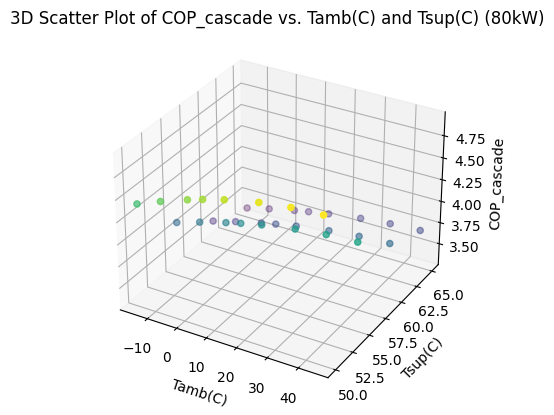

In [ ]:
df_plot_80 = filtered_results[filtered_results['Sum(kW)']==80]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extracting the variables
x = df_plot_80['Tamb(C)']
y = df_plot_80['Tsup(C)']
z = df_plot_80['COP_cascade']

# Creating the 3D scatter plot
ax.scatter(x, y, z, c=z, cmap='viridis')
ax.set_xlabel('Tamb(C)')
ax.set_ylabel('Tsup(C)')
ax.set_zlabel('COP_cascade')
ax.set_title('3D Scatter Plot of COP_cascade vs. Tamb(C) and Tsup(C) (80kW)')

plt.show()


## Heat map (80kW)

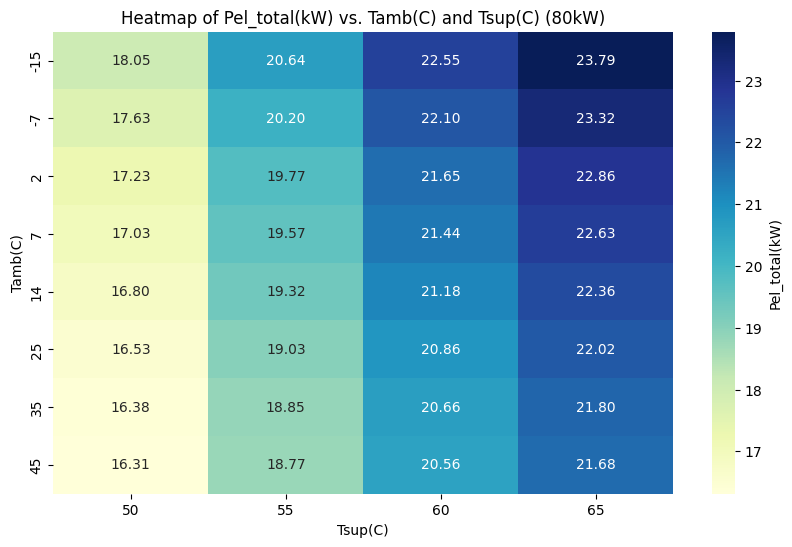

In [ ]:
df_plot_80 = filtered_results[filtered_results['Sum(kW)']==80]

# Pivot the DataFrame for heatmap
pivot_df = df_plot_80.pivot_table(values='Pel_total(kW)', index='Tamb(C)', columns='Tsup(C)')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'Pel_total(kW)'})
plt.xlabel('Tsup(C)')
plt.ylabel('Tamb(C)')
plt.title('Heatmap of Pel_total(kW) vs. Tamb(C) and Tsup(C) (80kW)')
plt.show()

## Heat map (60kW)

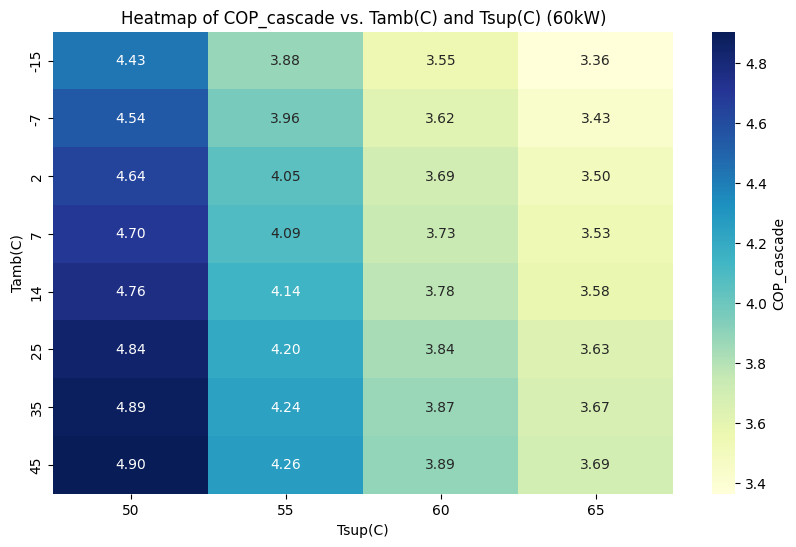

In [ ]:
df_plot_60 = filtered_results[filtered_results['Sum(kW)']==60]

# Pivot the DataFrame for heatmap
pivot_df = df_plot_80.pivot_table(values='COP_cascade', index='Tamb(C)', columns='Tsup(C)')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt=".2f", cbar_kws={'label': 'COP_cascade'})
plt.xlabel('Tsup(C)')
plt.ylabel('Tamb(C)')
plt.title('Heatmap of COP_cascade vs. Tamb(C) and Tsup(C) (60kW)')
plt.show()

### Variation of CAPFT in the optimized dataset that will be used for training

CAPFT is same for all the three heat pumps as we are using the same heatpump model

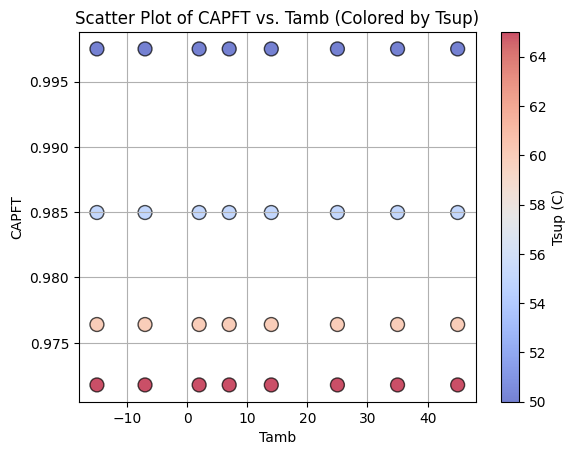

In [ ]:
# Create a color map based on Tsup values
cmap = plt.get_cmap('coolwarm')

# Normalize Tsup values to map them to the colormap
norm = plt.Normalize(df_plot_80['Tsup(C)'].min(), df_plot_80['Tsup(C)'].max())

plt.scatter(df_plot_80['Tamb(C)'], df_plot_80['CAPFT'],c=df_plot_80['Tsup(C)'],cmap=cmap,s=100,alpha=0.7, edgecolors='k', norm=norm)
plt.xlabel('Tamb')
plt.ylabel('CAPFT')
plt.title('Scatter Plot of CAPFT vs. Tamb (Colored by Tsup)')

cbar = plt.colorbar()
cbar.set_label('Tsup (C)')

# Show the plot
plt.grid(True)
plt.show()

### Variation of EIRFT in the optimized dataset that will be used for training

EIRFT is same for all the three heat pumps as we are using the same heatpump model

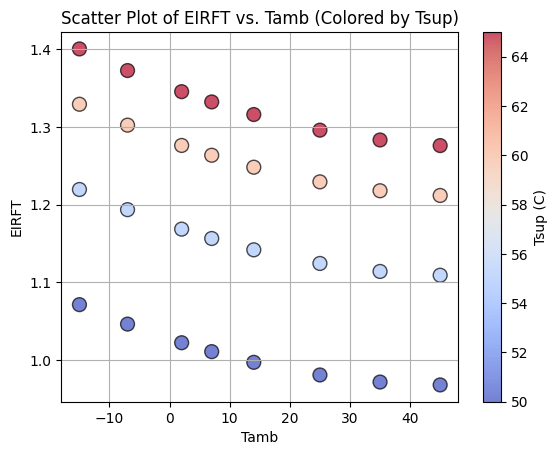

In [ ]:
# Create a color map based on Tsup values
cmap = plt.get_cmap('coolwarm')

# Normalize Tsup values to map them to the colormap
norm = plt.Normalize(df_plot_80['Tsup(C)'].min(), df_plot_80['Tsup(C)'].max())

plt.scatter(df_plot_80['Tamb(C)'], df_plot_80['EIRFT'],c=df_plot_80['Tsup(C)'],cmap=cmap,s=100,alpha=0.7, edgecolors='k', norm=norm)
plt.xlabel('Tamb')
plt.ylabel('EIRFT')
plt.title('Scatter Plot of EIRFT vs. Tamb (Colored by Tsup)')

cbar = plt.colorbar()
cbar.set_label('Tsup (C)')

# Show the plot
plt.grid(True)
plt.show()

### Variation of EIRFPLR1 when the demand is 80 kW

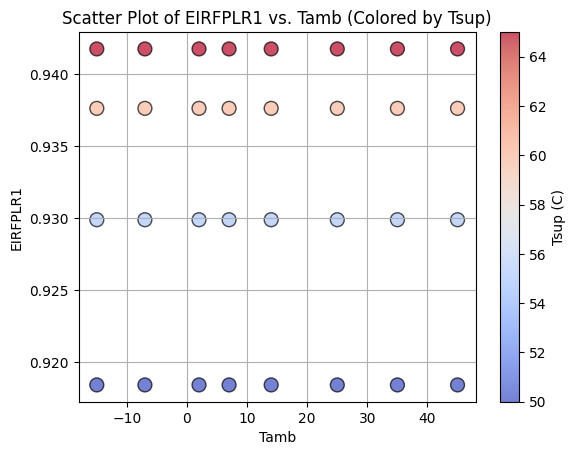

In [ ]:
# Create a color map based on Tsup values
cmap = plt.get_cmap('coolwarm')

# Normalize Tsup values to map them to the colormap
norm = plt.Normalize(df_plot_80['Tsup(C)'].min(), df_plot_80['Tsup(C)'].max())

plt.scatter(df_plot_80['Tamb(C)'], df_plot_80['EIRFPLR1'],c=df_plot_80['Tsup(C)'],cmap=cmap,s=100,alpha=0.7, edgecolors='k', norm=norm)
plt.xlabel('Tamb')
plt.ylabel('EIRFPLR1')
plt.title('Scatter Plot of EIRFPLR1 vs. Tamb (Colored by Tsup)')

cbar = plt.colorbar()
cbar.set_label('Tsup (C)')

# Show the plot
plt.grid(True)
plt.show()

### Variation of EIRFPLR2 when the demand is 80 kW

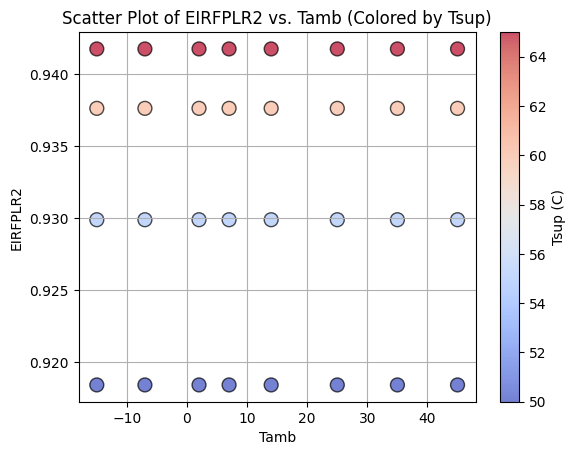

In [ ]:
# Create a color map based on Tsup values
cmap = plt.get_cmap('coolwarm')

# Normalize Tsup values to map them to the colormap
norm = plt.Normalize(df_plot_80['Tsup(C)'].min(), df_plot_80['Tsup(C)'].max())

plt.scatter(df_plot_80['Tamb(C)'], df_plot_80['EIRFPLR2'],c=df_plot_80['Tsup(C)'],cmap=cmap,s=100,alpha=0.7, edgecolors='k', norm=norm)
plt.xlabel('Tamb')
plt.ylabel('EIRFPLR2')
plt.title('Scatter Plot of EIRFPLR2 vs. Tamb (Colored by Tsup)')

cbar = plt.colorbar()
cbar.set_label('Tsup (C)')

# Show the plot
plt.grid(True)
plt.show()

### Variation of EIRFPLR3 when the demand is 80 kW

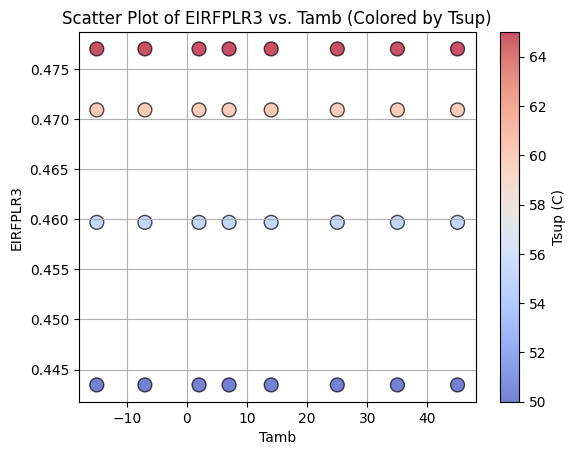

In [ ]:
# Create a color map based on Tsup values
cmap = plt.get_cmap('coolwarm')

# Normalize Tsup values to map them to the colormap
norm = plt.Normalize(df_plot_80['Tsup(C)'].min(), df_plot_80['Tsup(C)'].max())

plt.scatter(df_plot_80['Tamb(C)'], df_plot_80['EIRFPLR3'],c=df_plot_80['Tsup(C)'],cmap=cmap,s=100,alpha=0.7, edgecolors='k', norm=norm)
plt.xlabel('Tamb')
plt.ylabel('EIRFPLR3')
plt.title('Scatter Plot of EIRFPLR3 vs. Tamb (Colored by Tsup)')

cbar = plt.colorbar()
cbar.set_label('Tsup (C)')

# Show the plot
plt.grid(True)
plt.show()

## Training Decision tree

In [ ]:
selected_columns = ['Sum(kW)', 'Tamb(C)', 'Tsup(C)','q1(kW)', 'q2(kW)', 'q3(kW)']
DT_dataset = filtered_results[selected_columns]
DT_dataset

,Sum(kW),Tamb(C),Tsup(C),q1(kW),q2(kW),q3(kW)
0,20,-15,50,20.0,0.0,0.0
1,22,-15,50,22.0,0.0,0.0
2,24,-15,50,24.0,0.0,0.0
3,26,-15,50,26.0,0.0,0.0
4,28,-15,50,28.0,0.0,0.0
...,...,...,...,...,...,...
1083,82,45,65,30.0,30.0,22.0
1084,84,45,65,30.0,30.0,24.0
1085,86,45,65,30.0,30.0,26.0
1086,88,45,65,30.0,30.0,28.0


In [ ]:
DT_dataset[DT_dataset['Sum(kW)']==54]

,Sum(kW),Tamb(C),Tsup(C),q1(kW),q2(kW),q3(kW)
14,54,-15,50,30.0,24.0,0.0
47,54,-15,55,30.0,24.0,0.0
82,54,-15,60,18.0,18.0,18.0
117,54,-15,65,18.0,18.0,18.0
150,54,-7,50,30.0,24.0,0.0
183,54,-7,55,30.0,24.0,0.0
218,54,-7,60,18.0,18.0,18.0
253,54,-7,65,18.0,18.0,18.0
286,54,2,50,30.0,24.0,0.0
319,54,2,55,30.0,24.0,0.0


In [ ]:
DT_dataset[DT_dataset['Sum(kW)']==46]

,Sum(kW),Tamb(C),Tsup(C),q1(kW),q2(kW),q3(kW)
10,46,-15,50,27.5,18.5,0.0
43,46,-15,55,27.5,18.5,0.0
78,46,-15,60,28.0,18.0,0.0
113,46,-15,65,28.0,18.0,0.0
146,46,-7,50,27.5,18.5,0.0
179,46,-7,55,27.5,18.5,0.0
214,46,-7,60,28.0,18.0,0.0
249,46,-7,65,28.0,18.0,0.0
282,46,2,50,27.5,18.5,0.0
315,46,2,55,27.5,18.5,0.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [ ]:
x = DT_dataset[['Sum(kW)', 'Tamb(C)', 'Tsup(C)']]
y = DT_dataset[['q1(kW)', 'q2(kW)', 'q3(kW)']]

In [ ]:
# Split the dataset into training (95%) and testing (5%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Create a Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=5,random_state=42)

# Fit the model on the training data
model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [ ]:
import pickle

# Save the model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(x_test)

In [ ]:
y_pred

array([[20.4047619 , 18.25      , 18.25      ],
       [30.        , 23.80952381, 18.19047619],
       [26.        ,  0.        ,  0.        ],
       [29.74      , 18.93      , 18.25      ],
       [29.88297872, 19.13829787,  0.        ],
       [24.65116279, 18.23255814, 18.23255814],
       [29.88297872, 19.13829787,  0.        ],
       [22.        ,  0.        ,  0.        ],
       [30.        , 30.        , 28.        ],
       [20.4047619 , 18.25      , 18.25      ],
       [29.74      , 18.93      , 18.25      ],
       [26.        ,  0.        ,  0.        ],
       [26.        ,  0.        ,  0.        ],
       [24.65116279, 18.23255814, 18.23255814],
       [24.65116279, 18.23255814, 18.23255814],
       [30.        , 29.89285714, 19.01190476],
       [30.        , 30.        , 22.        ],
       [20.4047619 , 18.25      , 18.25      ],
       [18.        , 18.        , 18.        ],
       [20.        ,  0.        ,  0.        ],
       [29.88297872, 19.13829787,  0.   

In [ ]:
y_test

,q1(kW),q2(kW),q3(kW)
355,20.0,18.0,18.0
56,30.0,23.5,18.5
478,26.0,0.0,0.0
701,30.0,19.5,18.5
724,29.5,18.5,0.0
...,...,...,...
877,30.0,30.0,22.0
585,23.5,18.5,0.0
305,20.0,0.0,0.0
716,26.0,0.0,0.0


In [ ]:
# Calculate the Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 0.11669880464900173


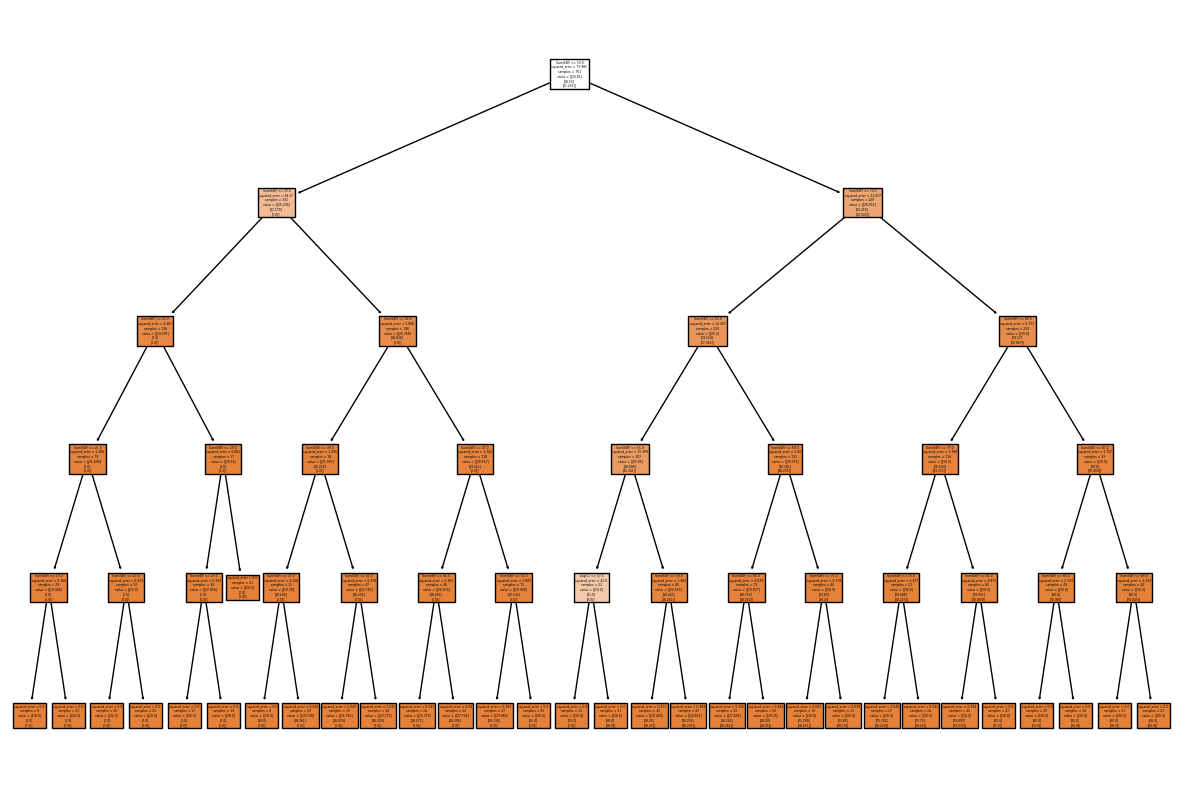

In [ ]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=x.columns, filled=True)
plt.show()

In [ ]:
# Function to predict q1, q2, and q3 based on user input
def predict_q_values(Sum, Tamb, Tsup):
    if Sum == 0:
        return 0, 0, 0  # If Sum is 0, set q1, q2, and q3 to 0

    # Create a DataFrame with user input
    user_input = pd.DataFrame({'Sum(kW)': [Sum], 'Tamb(C)': [Tamb], 'Tsup(C)': [Tsup]})

    # Use the trained model to make predictions
    predicted_values = model.predict(user_input)

    # Return the predicted q1, q2, and q3 values
    return predicted_values[0]


In [ ]:
#Tamb = [-15,-7,2,7,14,25,35,45]
#Tsup = [50,55,60,65]
user_sum = 0
user_tamb = 0
user_tsup = 65

predicted_q_values = predict_q_values(user_sum, user_tamb, user_tsup)
print(f"Predicted q1(kW), q2(kW), q3(kW): {predicted_q_values}")

Predicted q1(kW), q2(kW), q3(kW): (0, 0, 0)


In [ ]:
input_file = pd.read_excel('Input_file.xlsx')

In [ ]:
input_file

,Date,Date.1,Time,Q_total,Tsup,Tamb
0,Fri,2023-01-01,00:30:00,0.0,65.56,1.0
1,Fri,2023-01-01,01:30:00,0.0,65.56,1.7
2,Fri,2023-01-01,02:30:00,0.0,65.56,1.5
3,Fri,2023-01-01,03:30:00,0.0,65.56,1.3
4,Fri,2023-01-01,04:30:00,0.0,65.56,1.1
...,...,...,...,...,...,...
8755,Fri,2023-12-31,19:30:00,0.0,65.56,3.1
8756,Fri,2023-12-31,20:30:00,0.0,65.56,2.8
8757,Fri,2023-12-31,21:30:00,0.0,65.56,2.5
8758,Fri,2023-12-31,22:30:00,0.0,65.56,2.3


In [ ]:
output_file = input_file

In [ ]:
output_file

,Date,Date.1,Time,Q_total,Tsup,Tamb
0,Fri,2023-01-01,00:30:00,0.0,65.56,1.0
1,Fri,2023-01-01,01:30:00,0.0,65.56,1.7
2,Fri,2023-01-01,02:30:00,0.0,65.56,1.5
3,Fri,2023-01-01,03:30:00,0.0,65.56,1.3
4,Fri,2023-01-01,04:30:00,0.0,65.56,1.1
...,...,...,...,...,...,...
8755,Fri,2023-12-31,19:30:00,0.0,65.56,3.1
8756,Fri,2023-12-31,20:30:00,0.0,65.56,2.8
8757,Fri,2023-12-31,21:30:00,0.0,65.56,2.5
8758,Fri,2023-12-31,22:30:00,0.0,65.56,2.3


In [ ]:
output_file['q1(kW)'], output_file['q2(kW)'], output_file['q3(kW)'] = zip(*output_file.apply(lambda row: predict_q_values(row['Q_total'], row['Tamb'], row['Tsup']), axis=1))

In [ ]:
output_file

,Date,Date.1,Time,Q_total,Tsup,Tamb,q1(kW),q2(kW),q3(kW)
0,Fri,2023-01-01,00:30:00,0.0,65.56,1.0,0.0,0.0,0.0
1,Fri,2023-01-01,01:30:00,0.0,65.56,1.7,0.0,0.0,0.0
2,Fri,2023-01-01,02:30:00,0.0,65.56,1.5,0.0,0.0,0.0
3,Fri,2023-01-01,03:30:00,0.0,65.56,1.3,0.0,0.0,0.0
4,Fri,2023-01-01,04:30:00,0.0,65.56,1.1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,Fri,2023-12-31,19:30:00,0.0,65.56,3.1,0.0,0.0,0.0
8756,Fri,2023-12-31,20:30:00,0.0,65.56,2.8,0.0,0.0,0.0
8757,Fri,2023-12-31,21:30:00,0.0,65.56,2.5,0.0,0.0,0.0
8758,Fri,2023-12-31,22:30:00,0.0,65.56,2.3,0.0,0.0,0.0


In [ ]:
excel_file_path = 'output_data.xlsx'

In [ ]:
output_file.to_excel(excel_file_path, index=False)

In [ ]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: /content


In [ ]:
import pickle

# Load the model from the pickle file
with open('model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)